In [1]:
import sys
import numpy as np
import os
import utils
from matplotlib import pyplot as plt
from importlib import reload
import fig1
root = r'D:\Results\Zhong-et-al-2025'

In [2]:
beh_path = os.path.join(root, 'beh')
example_behavior = np.load(os.path.join(beh_path, 'example_bef_and_aft_learning_behavior.npy'), allow_pickle=1).item()
aftLearn_lick_raster = utils.get_lick_raster(example_behavior['TX109_2023_04_14_1'])

beh0 = np.load(os.path.join(beh_path, 'Beh_sup_train1_before_learning.npy'), allow_pickle=1).item()
mean_beh_bef = utils.get_mean_lick_response(beh0, lick_typ='befRew')

beh1 = np.load(os.path.join(beh_path, 'Beh_sup_train1_after_learning.npy'), allow_pickle=1).item()
mean_beh_aft = utils.get_mean_lick_response(beh1, lick_typ='befRew')

In [3]:
# load distribution map
fn0 = 'sup_train1_before_learning_dprime_distribution.npy'
fn1 = 'sup_train1_after_learning_dprime_distribution.npy'
fn2 = 'unsup_train1_before_learning_dprime_distribution.npy'
fn3 = 'unsup_train1_after_learning_dprime_distribution.npy'

img_sup_bef = np.load(os.path.join(root, 'process_data', fn0), allow_pickle=1).item()
img_sup_aft = np.load(os.path.join(root, 'process_data', fn1), allow_pickle=1).item()
img_unsup_bef = np.load(os.path.join(root, 'process_data', fn2), allow_pickle=1).item()
img_unsup_aft = np.load(os.path.join(root, 'process_data', fn3), allow_pickle=1).item()
outlines = np.load(os.path.join(root, 'retinotopy/areas.npz'), allow_pickle = True)['out']
hotcmp = fig1.make_hot_cmap()

In [4]:
# load selective neurons fraction
sup_frac_bef = np.load(os.path.join(root, 'process_data', 
                      'sup_train1_before_learning_dprime_frac.npy'), allow_pickle=1).item()
sup_frac_aft = np.load(os.path.join(root, 'process_data', 
                      'sup_train1_after_learning_dprime_frac.npy'), allow_pickle=1).item()
unsup_frac_bef = np.load(os.path.join(root, 'process_data', 
                      'unsup_train1_before_learning_dprime_frac.npy'), allow_pickle=1).item()
unsup_frac_aft = np.load(os.path.join(root, 'process_data', 
                      'unsup_train1_after_learning_dprime_frac.npy'), allow_pickle=1).item()
grat_frac_bef = np.load(os.path.join(root, 'process_data', 
                      'train1_before_grating_dprime_frac.npy'), allow_pickle=1).item()
grat_frac_aft = np.load(os.path.join(root, 'process_data', 
                      'train1_after_grating_dprime_frac.npy'), allow_pickle=1).item()

In [10]:
# load coding direction
fn = 'sup_test1_coding_direction.npy'
cd_proj = utils.load_coding_direction(os.path.join(root, 'process_data'), fn)
# load sorded spikes
fn = 'sup_test1_sort_spk.npy'
sort_spk = np.load(os.path.join(root, 'process_data', fn), allow_pickle=1).item()

coding direction of leaf1 - circle1


dict_keys(['notes', 'spk_sort', 'all_stim', 'stim_ref', 'pos_length'])

In [1]:
reload(fig1)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 1), dpi=500)
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 5

# example lick raster
ax_circle = fig.add_axes([0, 0, 0.15, 1])
fig1.lick_raster_plot(ax_circle, aftLearn_lick_raster['sort_by_cue']['circle1'], 
                      show_reward=1, show_firstLick=0, title='circle1', tcolor='r')

ax_leaf = fig.add_axes([0.3, 0, 0.15, 1])
fig1.lick_raster_plot(ax_leaf, aftLearn_lick_raster['sort_by_cue']['leaf1'], 
                      show_reward=1, show_firstLick=0, title='leaf1', tcolor='b')

# perfomance before vs after learning, train1
ax_bef_learning = fig.add_axes([0.6, 0, 0.12, 1])
fig1.sup_perf_plot(ax_bef_learning, mean_beh_bef, title='before learning')  

ax_aft_learning = fig.add_axes([0.8, 0, 0.12, 1])
fig1.sup_perf_plot(ax_aft_learning, mean_beh_aft, title='after learning')  

# selective distribution map
x, y, w, h, dx = -0.05, -1.5, 0.2, 1, 0.2
axes_sup = [fig.add_axes([x + i*dx, y, w, h]) for i in range(2)]
axes_unsup = [fig.add_axes([x + i*dx, y-1.2, w, h]) for i in range(2)]

a, b, n =5, 10, 8
vmax = a/(b**n) # i.e. 5x10e-8

fig1.distribution_map(axes_sup[0], img_sup_bef['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=1)
axes_sup[0].text(0.35, 0.85, 'task mice\nbefore learning', transform=axes_sup[0].transAxes)
fig1.distribution_map(axes_sup[1], img_sup_aft['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=1)
axes_sup[1].text(0.35, 0.85, 'task mice\nafter learning', transform=axes_sup[1].transAxes)
fig1.distribution_map(axes_unsup[0], img_unsup_bef['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=1)
axes_unsup[0].text(0.35, 0.85, 'unsupervised\nbefore learning', transform=axes_unsup[0].transAxes)
fig1.distribution_map(axes_unsup[1], img_unsup_aft['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=1)
axes_unsup[1].text(0.35, 0.85, 'unsupervised\nafter learning', transform=axes_unsup[1].transAxes)

cbar2 = fig.add_axes([x+dx+w*1, y+0.1, 0.006, 0.5])
fig1.cbar(cbar2, cmap=hotcmp, tickLabel=[0, r'$5\times10^{-8}$'], cbarLabel='density', ticks=[0, 1], labelpad=-15)

ax_frac = fig.add_axes([0.50, -2.5, 0.5, 2])
# plot fraction of selective neuorn at threshold of 0.3
fig1.plot_frac(ax_frac, sup_frac_bef['value'][:, :, 2, 0], sup_frac_aft['value'][:, :, 2, 0], col='g')
fig1.plot_frac(ax_frac, unsup_frac_bef['value'][:, :, 2, 0], unsup_frac_aft['value'][:, :, 2, 0], col=[0.46,0,0.23])
fig1.plot_frac(ax_frac, grat_frac_bef['value'][:, :, 2, 0], grat_frac_aft['value'][:, :, 2, 0], col='0.5')

ax_frac.text(0.8, 0.9, 'task mice', color='g', transform=ax_frac.transAxes)
ax_frac.text(0.8, 0.85, 'unsupervised', color=[0.46,0,0.23], transform=ax_frac.transAxes)
ax_frac.text(0.8, 0.8, 'unsup_grating', color='0.5', transform=ax_frac.transAxes)


########## plot projection of coding direction, task mice #########
x, y, w, h, dx = 0, -4, 0.19, 1, 0.27
axes_cd_proj = [fig.add_axes([x + i*dx, y, w, h]) for i in range(4)]
fn = 'sup_test1_coding_direction.npy'
cd_proj = utils.load_coding_direction(os.path.join(root, 'process_data'), fn)
fig1.plot_test1_CD_proj(axes_cd_proj, cd_proj)

x, y, w, h, dx = 0, -5.5, 0.19, 1, 0.27
axes_sequence = [fig.add_axes([x + i*dx, y, w, h]) for i in range(4)]
fig1.test1_peak_pos_scatter_plot(axes_sequence, sort_spk, mname='VR2', arname='mHV', stim_sort='leaf1', vmax = 1)

x, y, w, h, dx = 0, -7, 0.19, 1, 0.27
axes_scatter = [fig.add_axes([x + i*dx, y, w, h]) for i in range(4)]
fig1.peak_position_scatter_plot(axes_scatter, sort_spk, mname='VR2', arname='mHV', stim_sort='leaf1')

NameError: name 'reload' is not defined

In [409]:
reload(utils)
reload(fig1)

<module 'fig1' from 'D:\\Codes\\zhong-et-al-2025\\fig1.py'>

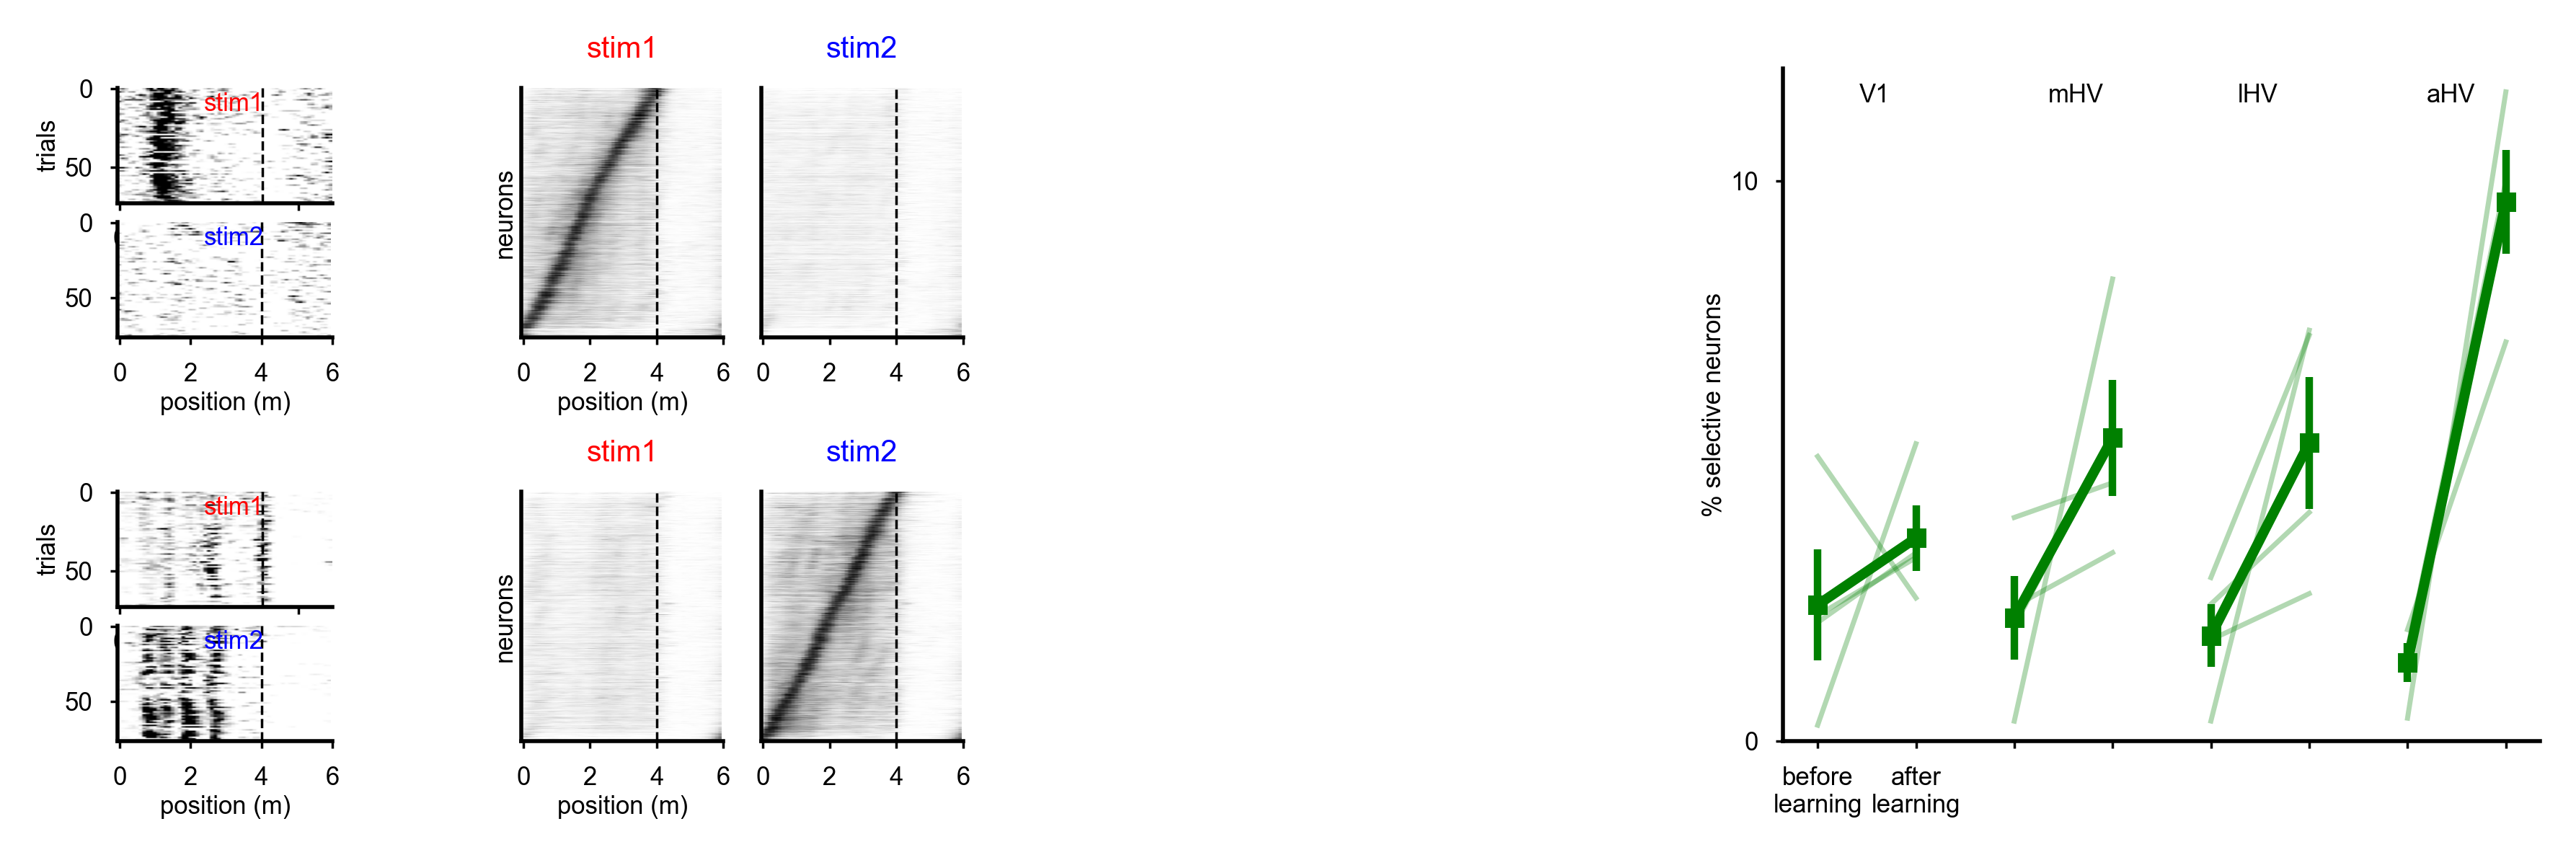

In [166]:
reload(fig1)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(7, 8*7/10.5),dpi=500)
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 5

x,y, w,h =0.7,0.18, 0.3,0.35
ax_frac = fig.add_axes([x,y,w,h])
fig1.plot_rewPred_neu_frac(ax_frac, root, fn0='sup_train1_before_learning_rew_frac.npy', 
                      fn1='sup_train1_after_learning_rew_frac.npy', col='g')

################## circle prefered single neurons  ######################
x,y, dx,dy, w,h =0.04,0.39, 0,0.07, 0.085,0.06
neuID = 27
axes = [fig.add_axes([x,y+dy,w,h]), fig.add_axes([x,y,w,h])]
fig1.plot_exampe_stimSel_single_neuron(axes, root=root, stim=0, neu_n=neuID, vmax=3)

# ################## leaf prefered single neurons  ######################
x,y, dx,dy, w,h =0.04,0.18, 0,0.07, 0.085,0.06
neuID = 21
axes = [fig.add_axes([x,y+dy,w,h]), fig.add_axes([x,y,w,h])]
fig1.plot_exampe_stimSel_single_neuron(axes, root=root, stim=1, neu_n=neuID, vmax=3)

################## circle prefered all neurons  ######################
x,y, dx,dy, w,h =0.2,0.39, 0.095,0, 0.08,0.13
axes = [fig.add_axes([x,y,w,h]), fig.add_axes([x+dx,y,w,h])]
fig1.plot_exampe_stimSel_population(axes, root=root, stim=0)

# ################## leaf prefered all neurons  ######################
x,y, dx,dy, w,h =0.2,0.18, 0.095,0, 0.08,0.13
axes = [fig.add_axes([x,y,w,h]), fig.add_axes([x+dx,y,w,h])]
fig1.plot_exampe_stimSel_population(axes, root=root, stim=1)


In [42]:
reload(utils)

out = utils.load_example_stimSelNeu(root)

In [92]:
neuID = 0

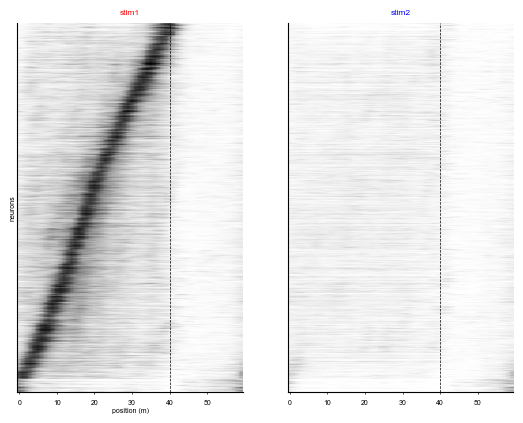

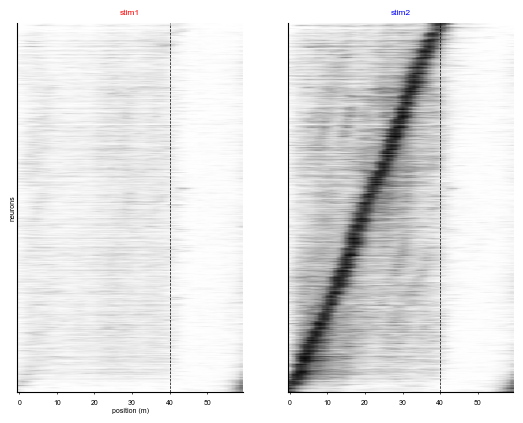

In [156]:
def plot_exampe_stimSel_population(ax, root='', stim=0,  vmax=2, cols=['r', 'b']):
    out = utils.load_example_stimSelNeu(root)
    if stim==0:
        sortInd = out['stim1_neu_sortID']
        stim1_tr = out['population']['stim1Sel_in_stim1'][sortInd]
        stim2_tr = out['population']['stim1Sel_in_stim2'][sortInd]
    elif stim==1:
        sortInd = out['stim2_neu_sortID']
        stim1_tr = out['population']['stim2Sel_in_stim1'][sortInd]
        stim2_tr = out['population']['stim2Sel_in_stim2'][sortInd]
    ax[0].imshow(stim1_tr, cmap='gray_r', vmin=0, vmax=vmax)
    ax[0].axvline(40, linestyle='--', lw=0.5, color='k')
    utils.fmt(ax[0], xlabel='position (m)', ylabel='neurons', y_invert=1, ytick=[[]], title='stim1', tcolor=cols[0])
    ax[1].imshow(stim2_tr, cmap='gray_r', vmin=0, vmax=vmax)
    ax[1].axvline(40, linestyle='--', lw=0.5, color='k')
    utils.fmt(ax[1], y_invert=1, ytick=[[]], title='stim2', tcolor=cols[1])       
    
fig, axes = plt.subplots(1, 2)

neuID = 27
plot_exampe_stimSel_population(axes, root=root, stim=0)

fig, axes = plt.subplots(1, 2)
neuID = 21
plot_exampe_stimSel_population(axes, root=root, stim=1)
# neuID +=1

In [139]:
out.keys()

dict_keys(['single_neu', 'population', 'Note'])

In [140]:
out['population'].keys()

dict_keys(['stim1Sel_in_stim1', 'stim1Sel_in_stim2', 'stim2Sel_in_stim1', 'stim2Sel_in_stim2'])

In [142]:
out['population']['stim1Sel_in_stim1'].shape

(5597, 60)

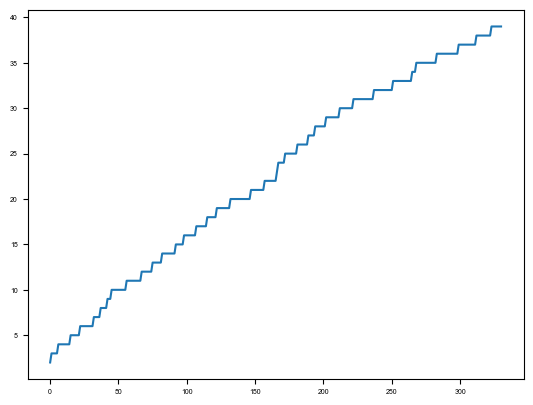

In [376]:
plt.plot(dd2)

In [298]:
fn = 'sup_test1_coding_direction.npy'
cd_proj = utils.load_coding_direction(os.path.join(root, 'process_data'), fn)

plot_test1_CD_proj(axes, out)

coding direction of leaf1 - circle1


In [245]:
out.keys()

dict_keys(['proj_single_trials', 'proj_mean', 'notes', 'stim_ref', 'pos_from_prev'])

In [260]:
out['proj_pos_mean'].shape

(5, 4, 7)

In [354]:
ttt = np.arange(10)
print(ttt)
print(ttt[::2])
print(ttt[1::2])

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[1 3 5 7 9]


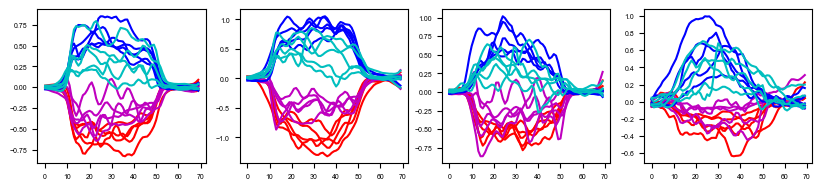

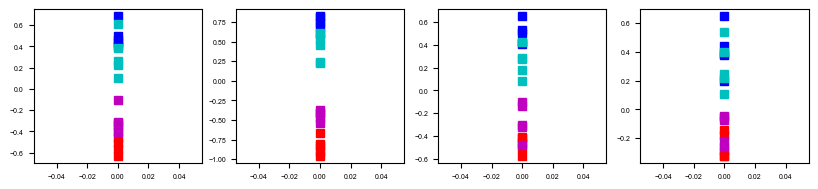

In [259]:
fig, axes = plt.subplots(1, 4, figsize=(10, 2))
for i, ic in enumerate(['r', 'm', 'b', 'c']):
    for j in range(4):
        axes[j].plot(out['proj_tr_mean'][:, j, i].T, color=ic)
fig, axes = plt.subplots(1, 4, figsize=(10, 2))
for i, ic in enumerate(['r', 'm', 'b', 'c']):
    for j in range(4):
        axes[j].plot(np.zeros(5), out['proj_pos_mean'][:, j, i], ls='None', marker='s', color=ic)        